In [1]:
%matplotlib inline
import numpy as np
import pylab as pl

symphony_build_path = '/home/alex/Documents/symphony/build'

import sys
sys.path.append(symphony_build_path)
import symphonyPy as sp

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [2]:
e = 4.80320680e-10
m = 9.1093826e-28
c = 2.99792458e10
B = 1.

theta_e = 0.5
theta   = np.pi / 3.

omega_c = e * B / (m * c)
nu_c    = omega_c / (2. * np.pi)

In [3]:
sp.alpha_nu_py(10. * nu_c, B, 1., theta, sp.MAXWELL_JUETTNER, sp.STOKES_V,
                                    theta_e, 3., 1., 1000., 1e10, 3.5, 10.)

-1.95097733690652e-12

In [4]:
data = np.loadtxt('output.txt')

symph = np.vectorize(sp.alpha_nu_py)(data[:, 0] / (2. * np.pi), B, 1., theta, sp.MAXWELL_JUETTNER, sp.STOKES_V,
                                    theta_e, 3., 1., 1000., 1e10, 3.5, 10.)

print data[:, 0] / omega_c

[  1.00000000e+00   2.15443469e+00   4.64158883e+00   1.00000000e+01
   2.15443469e+01   4.64158883e+01   1.00000000e+02   2.15443469e+02
   4.64158883e+02   1.00000000e+03   1.50000000e+03]


/usr/lib/python2.7/dist-packages/numpy/lib/function_base.py:2276: RuntimeWarning: invalid value encountered in alpha_nu_py (vectorized)
  outputs = ufunc(*inputs)


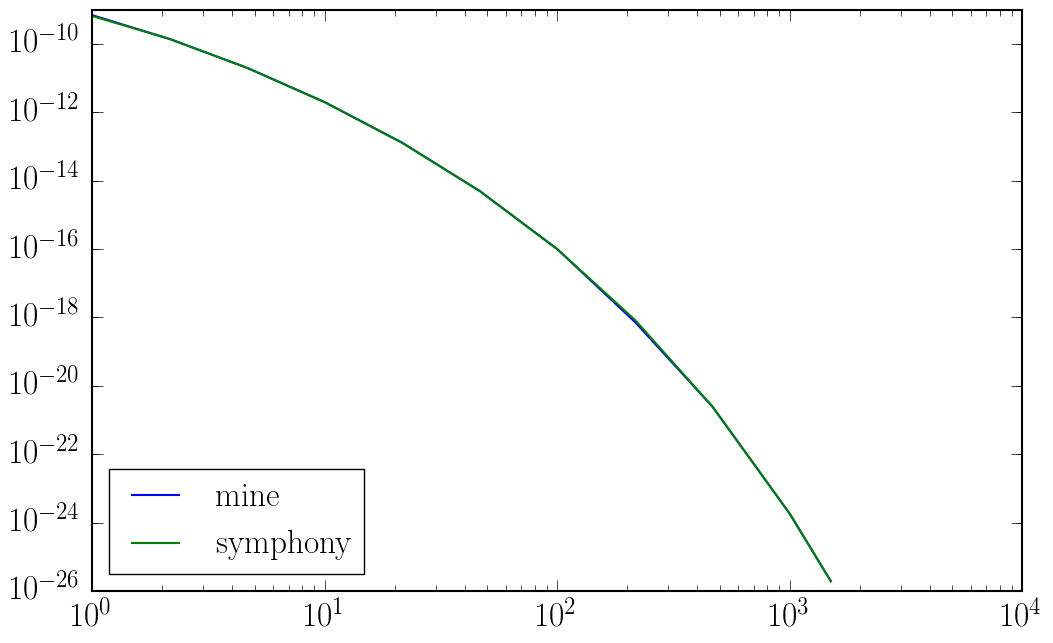

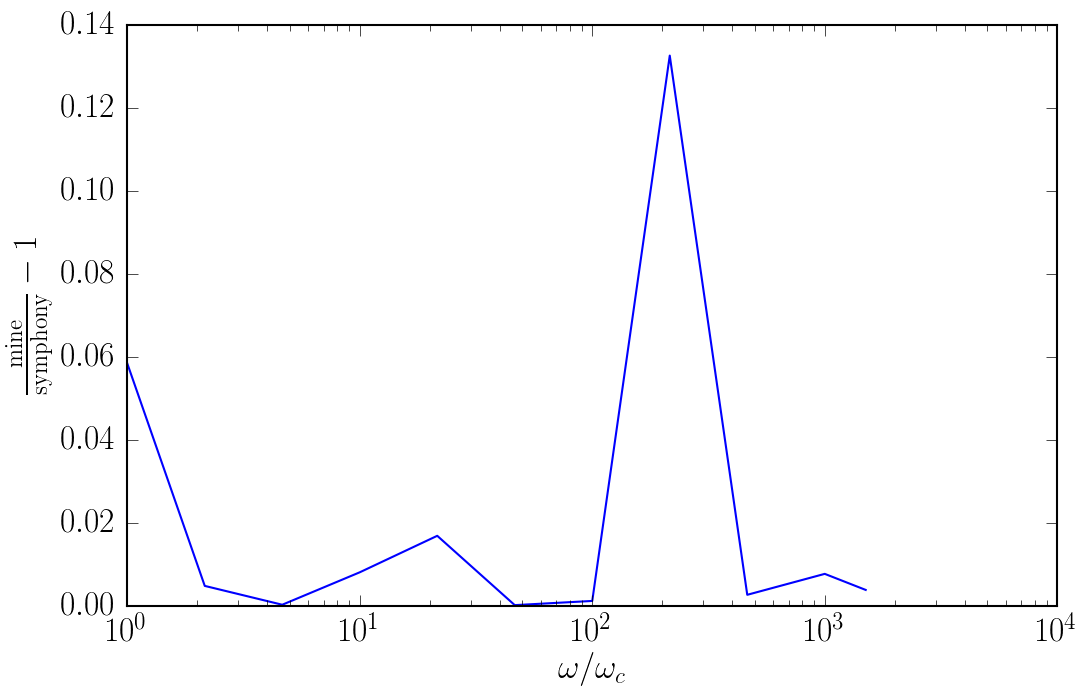

In [7]:
pl.loglog(data[:, 0] / omega_c, -data[:, 1], label='$\\mathrm{mine}$')
pl.loglog(data[:, 0] / omega_c, -symph,     label='$\\mathrm{symphony}$')
pl.legend(loc='lower left')
#pl.xlabel('$\\omega / \\omega_c$')
#pl.ylabel('$\\alpha_V$')
pl.show()

pl.semilogx(data[:, 0] / omega_c, np.abs(data[:, 1]/(symph) - 1.))
#pl.ylim([-1., 1.])
pl.xlabel('$\\omega / \\omega_c$')
pl.ylabel('$\\frac{\\mathrm{mine}}{\\mathrm{symphony}} - 1$')

In [20]:
data = np.loadtxt('/home/alex/Desktop/alpha_V_test_2.txt')

symph = np.vectorize(sp.alpha_nu_py)(data[:, 0] * nu_c, B, 1., theta, sp.MAXWELL_JUETTNER, sp.STOKES_V,
                                    theta_e, 3., 1., 1000., 1e10, 3.5, 10.)

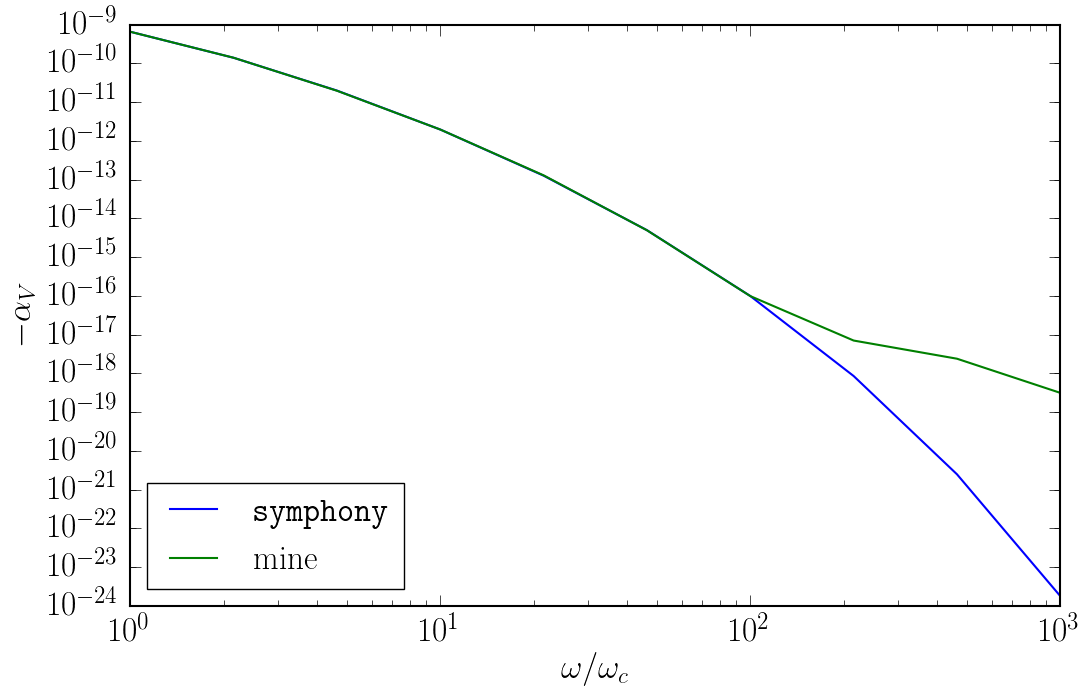

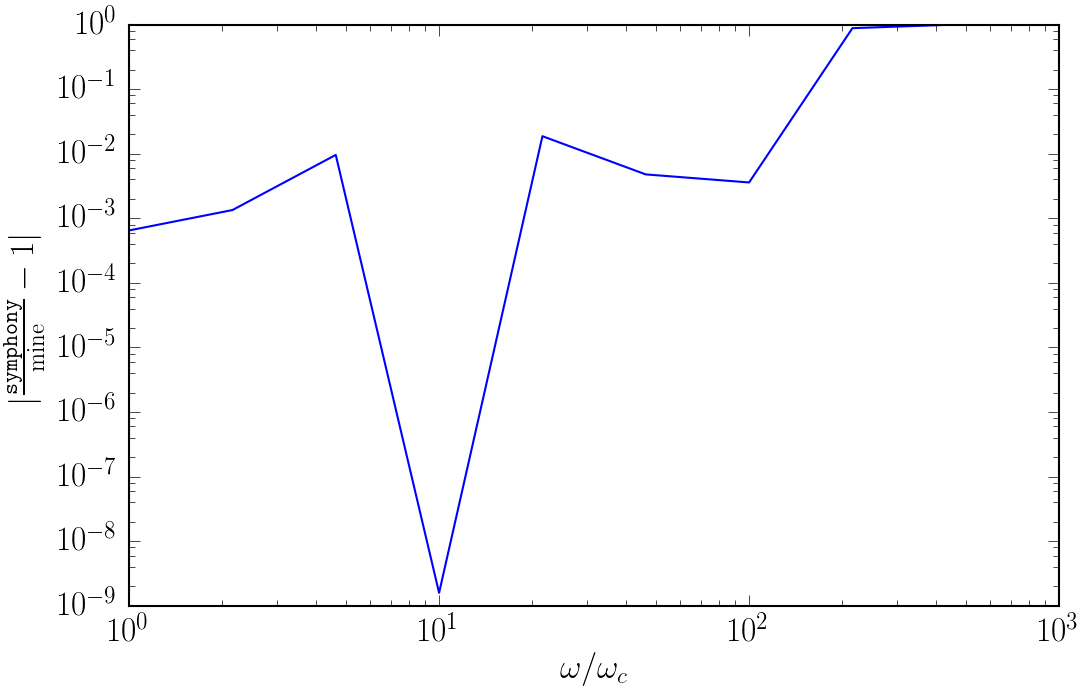

In [22]:
#print data[:, 1]
#print symph
#print data[:, 0]

pl.loglog(data[:, 0], -symph,      label='$\\tt{symphony}$')
pl.loglog(data[:, 0], -data[:, 1], label='$\\mathrm{mine}$')
pl.xlabel('$\\omega/\\omega_c$')
pl.ylabel('$-\\alpha_V$')
pl.legend(loc='lower left')
pl.show()

pl.loglog(data[:, 0], np.abs(symph/data[:, 1] - 1.))
pl.xlabel('$\\omega/\\omega_c$')
pl.ylabel('$|\\frac{\\tt{symphony}}{\\mathrm{mine}} - 1|$')

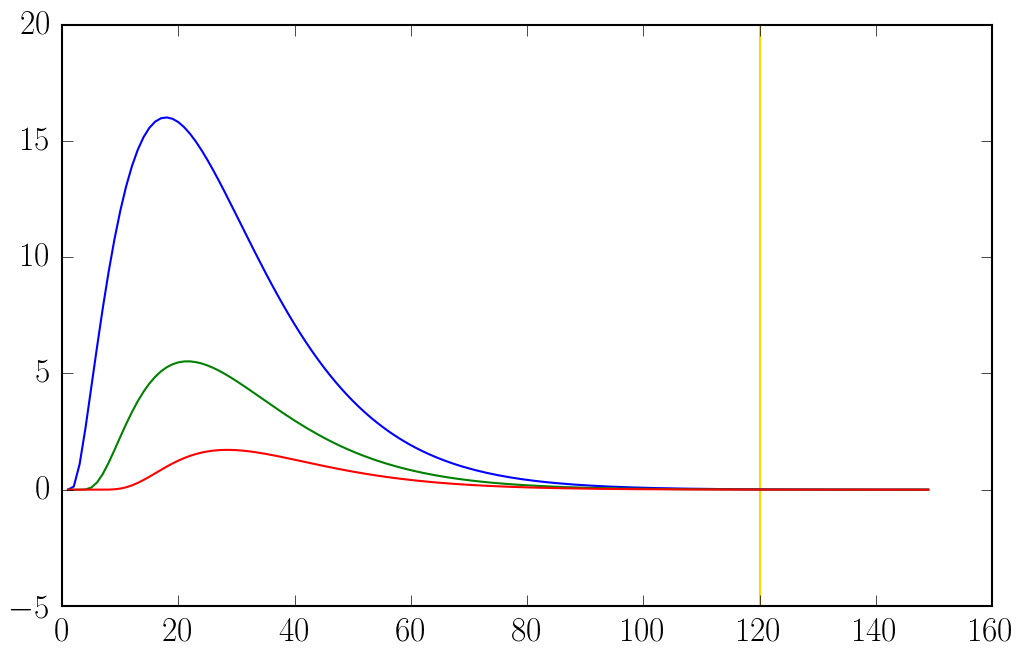

In [22]:
data = np.loadtxt('C_files/output.txt')
data2 = np.loadtxt('C_files/output2.txt')
data3 = np.loadtxt('C_files/output3.txt')

theta_e = 10.

pl.axvline(theta_e**2. + 20., color='gold')

x = data[:, 0]
y = data[:, 1]

x2 = data2[:, 0]
y2 = data2[:, 1]

x3 = data3[:, 0]
y3 = data3[:, 1]

pl.plot(x, y)
pl.plot(x2, y2)
pl.plot(x3, y3)

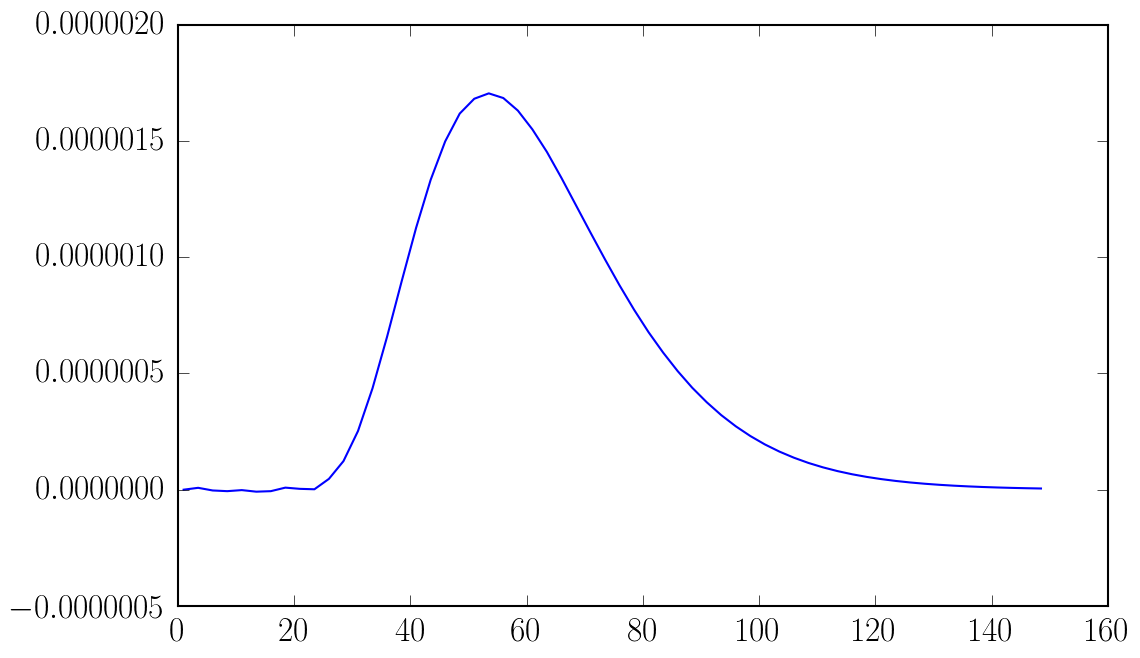

In [8]:
data = np.loadtxt('C_files/output.txt')

theta_e = 1.

#pl.axvline(theta_e**2. + 20., color='gold')

x = data[:, 0]
y = data[:, 1]

pl.plot(x, y)